In [1]:
import os
os.chdir(r"/Users/Greer/Desktop/Lending Club - From Misha/Payments")

import numpy as np
import pandas as pd
import seaborn as sns

# Import LC_UniqLoansEnded_All (All Unique Loan IDs, final period, from LC)

In [5]:
import csv

## Check the attributes list
with open('LC_UniqLoansEnded_All_LoanAmt.csv', newline='') as f:
  reader = csv.reader(f)
  row1 = next(reader)
    
print(row1)

['', 'PRNCP_PAID', 'INT_PAID', 'FEE_PAID', 'DUE_AMT', 'RECEIVED_AMT', 'RECEIVED_D', 'PERIOD_END_LSTAT', 'MONTH', 'PBAL_END_PERIOD', 'MOB', 'CO', 'COAMT', 'InterestRate', 'IssuedDate', 'MONTHLYCONTRACTAMT', 'dti', 'State', 'HomeOwnership', 'MonthlyIncome', 'EarliestCREDITLine', 'OpenCREDITLines', 'TotalCREDITLines', 'RevolvingCREDITBalance', 'RevolvingLineUtilization', 'Inquiries6M', 'DQ2yrs', 'MonthsSinceDQ', 'PublicRec', 'MonthsSinceLastRec', 'EmploymentLength', 'currentpolicy', 'grade', 'term', 'APPL_FICO_BAND', 'Last_FICO_BAND', 'VINTAGE', 'PCO_RECOVERY', 'PCO_COLLECTION_FEE', 'LOAN_AMT']


In [42]:
df = pd.read_csv("LC_UniqLoansEnded_All_LoanAmt.csv", low_memory=False)
df.head()

,Unnamed: 0,PRNCP_PAID,INT_PAID,FEE_PAID,DUE_AMT,RECEIVED_AMT,RECEIVED_D,PERIOD_END_LSTAT,MONTH,PBAL_END_PERIOD,...,EmploymentLength,currentpolicy,grade,term,APPL_FICO_BAND,Last_FICO_BAND,VINTAGE,PCO_RECOVERY,PCO_COLLECTION_FEE,LOAN_AMT
0,0,7319.814971,72.265029,0.0,829.10,7392.08,OCT2011,Fully Paid,OCT2011,0.000000,...,< 1 year,1,B,36,735-739,780-784,09Q3,NaN,NaN,25000.0
1,1,531.843308,7.126692,0.0,35.20,538.97,MAR2010,Fully Paid,MAR2010,0.000000,...,< 1 year,0,F,36,640-644,675-679,08Q3,NaN,NaN,1000.0
2,2,226.464561,2.015439,0.0,227.84,228.48,JUN2011,Fully Paid,MAY2011,0.000000,...,< 1 year,1,B,36,705-709,740-744,08Q2,NaN,NaN,7000.0
3,4,0.000000,0.000000,0.0,1315.20,0.00,NaN,Charged Off,JUN2009,6216.378467,...,10+ years,0,F,36,645-649,LOW-499,08Q2,0.25,0.04,7000.0
4,6,0.000000,0.000000,0.0,4500.56,0.00,NaN,Charged Off,APR2015,23365.347966,...,1 year,1,D,36,660-664,600-604,14Q3,3354.94,603.44,25000.0


In [10]:
len(df)

,Unnamed: 0,PRNCP_PAID,INT_PAID,FEE_PAID,DUE_AMT,RECEIVED_AMT,RECEIVED_D,PERIOD_END_LSTAT,MONTH,PBAL_END_PERIOD,...,EmploymentLength,currentpolicy,grade,term,APPL_FICO_BAND,Last_FICO_BAND,VINTAGE,PCO_RECOVERY,PCO_COLLECTION_FEE,LOAN_AMT
0,0,7319.814971,72.265029,0.0,829.10,7392.08,OCT2011,Fully Paid,OCT2011,0.000000,...,< 1 year,1,B,36,735-739,780-784,09Q3,NaN,NaN,25000.0
1,1,531.843308,7.126692,0.0,35.20,538.97,MAR2010,Fully Paid,MAR2010,0.000000,...,< 1 year,0,F,36,640-644,675-679,08Q3,NaN,NaN,1000.0
2,2,226.464561,2.015439,0.0,227.84,228.48,JUN2011,Fully Paid,MAY2011,0.000000,...,< 1 year,1,B,36,705-709,740-744,08Q2,NaN,NaN,7000.0
3,4,0.000000,0.000000,0.0,1315.20,0.00,NaN,Charged Off,JUN2009,6216.378467,...,10+ years,0,F,36,645-649,LOW-499,08Q2,0.25,0.04,7000.0
4,6,0.000000,0.000000,0.0,4500.56,0.00,NaN,Charged Off,APR2015,23365.347966,...,1 year,1,D,36,660-664,600-604,14Q3,3354.94,603.44,25000.0


In [43]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [44]:
df.reset_index
df.shape

(374225, 39)

## CHECK FEATURES

In [13]:
df.iloc[:4,:10]
# Note: PRNCP_PAID + INT_PAID = RECEIVED_AMT
# MOB = months on book
# CO = probably co-signer status

,PRNCP_PAID,INT_PAID,FEE_PAID,DUE_AMT,RECEIVED_AMT,RECEIVED_D,PERIOD_END_LSTAT,MONTH,PBAL_END_PERIOD,MOB
0,7319.814971,72.265029,0.0,829.10,7392.08,OCT2011,Fully Paid,OCT2011,0.000000,26
1,531.843308,7.126692,0.0,35.20,538.97,MAR2010,Fully Paid,MAR2010,0.000000,20
2,226.464561,2.015439,0.0,227.84,228.48,JUN2011,Fully Paid,MAY2011,0.000000,36
3,0.000000,0.000000,0.0,1315.20,0.00,NaN,Charged Off,JUN2009,6216.378467,14


In [14]:
df.iloc[:4,10:22]

,CO,COAMT,InterestRate,IssuedDate,MONTHLYCONTRACTAMT,dti,State,HomeOwnership,MonthlyIncome,EarliestCREDITLine,OpenCREDITLines,TotalCREDITLines
0,0,0.000000,0.1189,AUG2009,829.10,19.48,CA,RENT,7083.333333,FEB1994,10.0,42.0
1,0,0.000000,0.1608,JUL2008,35.20,23.84,IL,RENT,2500.000000,AUG2001,9.0,15.0
2,0,0.000000,0.1071,MAY2008,228.22,14.29,NY,RENT,5416.666667,OCT2000,7.0,7.0
3,1,6216.378467,0.1608,APR2008,246.38,22.47,CA,MORTGAGE,15791.666667,JUL1988,16.0,31.0


In [19]:
df.iloc[:4,22:30]

,RevolvingCREDITBalance,RevolvingLineUtilization,Inquiries6M,DQ2yrs,MonthsSinceDQ,PublicRec,MonthsSinceLastRec,EmploymentLength
0,28854,0.521,0.0,0.0,NaN,0.0,NaN,< 1 year
1,10125,0.904,1.0,0.0,NaN,0.0,NaN,< 1 year
2,33623,0.767,0.0,0.0,NaN,0.0,NaN,< 1 year
3,150971,0.923,4.0,0.0,0.0,0.0,0.0,10+ years


In [20]:
df.iloc[:4,30:40]

,currentpolicy,grade,term,APPL_FICO_BAND,Last_FICO_BAND,VINTAGE,PCO_RECOVERY,PCO_COLLECTION_FEE,LOAN_AMT
0,1,B,36,735-739,780-784,09Q3,NaN,NaN,25000.0
1,0,F,36,640-644,675-679,08Q3,NaN,NaN,1000.0
2,1,B,36,705-709,740-744,08Q2,NaN,NaN,7000.0
3,0,F,36,645-649,LOW-499,08Q2,0.25,0.04,7000.0


# DATA MUNGING

In [45]:
###### DROP LOAN_ID AND EXTRANEOUS/USELESS/STRING VARIABLES ######

## Drop Useless Strings
df.drop(['RECEIVED_D','MONTH','IssuedDate','VINTAGE'], axis=1, inplace=True)

## Drop Extraneous/useless
df.drop(['LOAN_ID','CO','COAMT','MonthsSinceDQ','MonthsSinceLastRec','currentpolicy','PCO_RECOVERY',
         'PCO_COLLECTION_FEE','PRNCP_PAID','INT_PAID','FEE_PAID','DUE_AMT'], axis=1, inplace=True)

In [46]:
###### IMPORTANT (adjustable depending upon analysis goal) ######
###### Drop additional vars that are NOT in LC data available to investors when they are deciding ######
df.drop(['Last_FICO_BAND','RECEIVED_AMT'], axis=1, inplace=True)

In [47]:
## Count occurrences of every potential value of PERIOD_END_LSTAT
import collections
print(collections.Counter(line.rstrip().rpartition('    ')[-1] for line in df.PERIOD_END_LSTAT))

Counter({'Fully Paid': 286551, 'Charged Off': 64363, 'Late (31-120 days)': 13356, 'Late (16-30 days)': 6860, 'In Grace Period': 2509, 'Issued': 383, 'Default': 203})


### CONSTRUCT DEPENDENT VARIABLE: DEFINE DEFAULT

In [48]:
###### IMPORTANT (adjustable depending upon analysis goal) ######

## Definition using PERIOD_END_LSTAT: default if not 'Fully Paid', 'In Grace Period' or 'Issued'

df['Default'] = np.where((df.PERIOD_END_LSTAT != 'Fully Paid') & (df.PERIOD_END_LSTAT != 'In Grace Period')
                         & (df.PERIOD_END_LSTAT != 'Issued'), 1, 0)
df[['PERIOD_END_LSTAT','Default']][1100:1120]

df.drop('PERIOD_END_LSTAT', axis=1, inplace=True)

## Definition 2: Amount of default (need original loan amount to do this)
# threshold = .50
# df['Default_Amt'] = 

### CONVERT USEFUL STRING VARIABLES TO CATEGORICAL

In [24]:
## Count occurrences of every potential value of HomeOwnership
import collections
print(collections.Counter(line.rstrip().rpartition('    ')[-1] for line in df.HomeOwnership))

Counter({'MORTGAGE': 184423, 'RENT': 155341, 'OWN': 34234, 'OTHER': 179, 'NONE': 48})


In [49]:
# state
df['StateCat'] = pd.Categorical.from_array(df.State).codes
# homeownership
df['HomeOwnCat'] = pd.Categorical.from_array(df.HomeOwnership).codes
# grade
df['GradeCat'] = pd.Categorical.from_array(df.grade).codes

df.drop(['HomeOwnership','grade','State'], axis=1, inplace=True)

In [50]:
###### Convert employment length into more useful format ######

df.replace('n/a', np.nan,inplace=True)
df.EmploymentLength.fillna(value=0,inplace=True)
df['EmploymentLength'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['EmploymentLength'] = df['EmploymentLength'].astype(int)

### CONVERT FICO BANDS TO AVERAGES

In [51]:
## Convert APPL_FICO_BAND to average
n = len(df)
APPL_FICO_avg = []
    
for i in range(0,n):
    if i % 50000 == 0:
        print("evaluating row %d" %i)
    string = df.iloc[i]['APPL_FICO_BAND']
    if string == '850':
        APPL_FICO_avg.append(850)
    else:
        j = int(string.split(" ")[0].split("-")[0])
        k = int(string.split("-")[1].split(" ")[0])
        avg = (j+k)//2
        APPL_FICO_avg.append(avg)

## Convert Last_FICO_BAND to average
# Last_FICO_avg = []
# for i in range(0,n):
#     if i % 100000 == 0:
#         print("evaluating row %d" %i)
#     string = df.iloc[i]['Last_FICO_BAND']
#     if string == 'MISSING':
#         Last_FICO_avg.append(0)
#     elif string == 'LOW-499':
#         Last_FICO_avg.append(400)
#     elif string == '845-HIGH':
#         Last_FICO_avg.append(848)
#     else:
#         j = int(string.split(" ")[0].split("-")[0])
#         k = int(string.split("-")[1].split(" ")[0])
#         avg = (j+k)//2
#         Last_FICO_avg.append(avg)
    
df['APPL_FICO_BAND'] = pd.Series(APPL_FICO_avg, index=df.index)
# df['Last_FICO_BAND'] = pd.Series(Last_FICO_avg, index=df.index)

evaluating row 0
evaluating row 50000
evaluating row 100000
evaluating row 150000
evaluating row 200000
evaluating row 250000
evaluating row 300000
evaluating row 350000


### Convert Earliest Credit Line to number of months

In [52]:
from datetime import datetime

df['EarliestCREDITLine'] =  pd.to_datetime(df['EarliestCREDITLine'], format='%b%Y')

def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month

d2 = pd.datetime.now()
CreditMonths = []

for i in range(0,n):
    d1 = df['EarliestCREDITLine'].iloc[i]
    diff = diff_month(d2,d1)
    CreditMonths.append(diff)
    
df['EarliestCreditMonths'] = pd.Series(CreditMonths, index=df.index)
df.drop('EarliestCREDITLine', axis=1, inplace=True)

### Fill in any additional existing NaNs

In [53]:
df.fillna(0.0,inplace=True)
df.fillna(0,inplace=True)

## Ensure all data is in float form

In [54]:
df.dtypes

PBAL_END_PERIOD             float64
MOB                           int64
InterestRate                float64
MONTHLYCONTRACTAMT          float64
dti                         float64
MonthlyIncome               float64
OpenCREDITLines             float64
TotalCREDITLines            float64
RevolvingCREDITBalance        int64
RevolvingLineUtilization    float64
Inquiries6M                 float64
DQ2yrs                      float64
PublicRec                    object
EmploymentLength              int64
term                          int64
APPL_FICO_BAND                int64
LOAN_AMT                    float64
Default                       int64
StateCat                       int8
HomeOwnCat                     int8
GradeCat                       int8
EarliestCreditMonths        float64
dtype: object

In [55]:
##### Fix 'PublicRec' value '*' #####

df['PublicRec'].replace('*', 0,inplace=True)
df['PublicRec'] = df['PublicRec'].astype(float)
df.PublicRec.value_counts()

0.0    323335
1.0     44120
2.0      4708
3.0      1282
4.0       424
5.0       191
6.0        91
7.0        37
8.0        28
9.0         9
Name: PublicRec, dtype: int64

In [56]:
## Ensure all data is in float form

df.apply(lambda x: pd.to_numeric(x, errors='coerce'))

,PBAL_END_PERIOD,MOB,InterestRate,MONTHLYCONTRACTAMT,dti,MonthlyIncome,OpenCREDITLines,TotalCREDITLines,RevolvingCREDITBalance,RevolvingLineUtilization,...,PublicRec,EmploymentLength,term,APPL_FICO_BAND,LOAN_AMT,Default,StateCat,HomeOwnCat,GradeCat,EarliestCreditMonths
0,0.000000,26,0.1189,829.10,19.48,7083.333333,10.0,42.0,28854,0.521,...,0.0,1,36,737,25000.0,0,4,4,1,275.0
1,0.000000,20,0.1608,35.20,23.84,2500.000000,9.0,15.0,10125,0.904,...,0.0,1,36,642,1000.0,0,14,4,5,185.0
2,0.000000,36,0.1071,228.22,14.29,5416.666667,7.0,7.0,33623,0.767,...,0.0,1,36,707,7000.0,0,34,4,1,195.0
3,6216.378467,14,0.1608,246.38,22.47,15791.666667,16.0,31.0,150971,0.923,...,0.0,10,36,647,7000.0,1,4,0,5,342.0
4,23365.347966,8,0.1699,891.20,10.50,5833.333333,10.0,17.0,19878,0.663,...,0.0,1,36,662,25000.0,1,34,4,3,199.0
5,0.000000,36,0.1311,40.50,5.47,4500.000000,5.0,31.0,2584,0.404,...,0.0,10,36,677,1200.0,0,43,3,2,384.0
6,0.000000,36,0.1357,366.86,11.63,2666.666667,14.0,40.0,3511,0.256,...,0.0,6,36,682,10800.0,0,6,4,2,241.0
7,0.000000,22,0.1905,264.11,2.05,4833.333333,6.0,25.0,3874,0.901,...,0.0,9,36,662,7200.0,0,39,4,3,273.0
8,0.000000,36,0.1008,162.34,8.10,7083.333333,3.0,11.0,33667,0.732,...,0.0,3,36,712,5025.0,0,4,4,1,194.0
9,0.000000,36,0.1426,102.92,14.97,6733.333333,13.0,23.0,4740,0.395,...,0.0,3,36,667,3000.0,0,43,0,2,222.0


In [57]:
df.dtypes

PBAL_END_PERIOD             float64
MOB                           int64
InterestRate                float64
MONTHLYCONTRACTAMT          float64
dti                         float64
MonthlyIncome               float64
OpenCREDITLines             float64
TotalCREDITLines            float64
RevolvingCREDITBalance        int64
RevolvingLineUtilization    float64
Inquiries6M                 float64
DQ2yrs                      float64
PublicRec                   float64
EmploymentLength              int64
term                          int64
APPL_FICO_BAND                int64
LOAN_AMT                    float64
Default                       int64
StateCat                       int8
HomeOwnCat                     int8
GradeCat                       int8
EarliestCreditMonths        float64
dtype: object

In [58]:
df.shape

(374225, 22)

In [59]:
df.to_csv("LC_UniqLoansEnded_All_LoanAmt_Clean.csv")

# DESCRIPTIVE STATS AND GRAPHS

In [1]:
########## SKIP CLEANING STEP ###########

import os
os.chdir(r"/Users/Greer/Desktop/Lending Club - From Misha/Payments")

import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [3]:
df = pd.read_csv("LC_UniqLoansEnded_All_LoanAmt_Clean.csv", low_memory=False)
df.drop(df.columns[[0]], axis=1, inplace=True)
df.reset_index
df.head()

,PBAL_END_PERIOD,MOB,InterestRate,MONTHLYCONTRACTAMT,dti,MonthlyIncome,OpenCREDITLines,TotalCREDITLines,RevolvingCREDITBalance,RevolvingLineUtilization,...,PublicRec,EmploymentLength,term,APPL_FICO_BAND,LOAN_AMT,Default,StateCat,HomeOwnCat,GradeCat,EarliestCreditMonths
0,0.000000,26,0.1189,829.10,19.48,7083.333333,10.0,42.0,28854,0.521,...,0.0,1,36,737,25000.0,0,4,4,1,275.0
1,0.000000,20,0.1608,35.20,23.84,2500.000000,9.0,15.0,10125,0.904,...,0.0,1,36,642,1000.0,0,14,4,5,185.0
2,0.000000,36,0.1071,228.22,14.29,5416.666667,7.0,7.0,33623,0.767,...,0.0,1,36,707,7000.0,0,34,4,1,195.0
3,6216.378467,14,0.1608,246.38,22.47,15791.666667,16.0,31.0,150971,0.923,...,0.0,10,36,647,7000.0,1,4,0,5,342.0
4,23365.347966,8,0.1699,891.20,10.50,5833.333333,10.0,17.0,19878,0.663,...,0.0,1,36,662,25000.0,1,34,4,3,199.0


In [60]:
## Examine distribution of delinquency
df.Default.value_counts()

0    289443
1     84782
Name: Default, dtype: int64

In [61]:
###### SOME GRAPHICAL ANALYSIS ######

### Highly Correlated Data
## examine our dataframe's correlation matrix and drop highly correlated/redundant data to address multicollinearity
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

TotalCREDITLines  OpenCREDITLines    0.677265
Default           PBAL_END_PERIOD    0.775464
GradeCat          InterestRate       0.948631
dtype: float64

In [4]:
###### DROP HIGHLY MULTICOLLINEAR (rho > |.65|) VARIABLES ######
df.drop(['GradeCat','PBAL_END_PERIOD'], axis=1, inplace=True)

# RFC deals well with multicollinearity, so leave in some collinear vars for now

In [5]:
###### This Version ONLY #######
df.drop('MOB', axis=1, inplace=True)

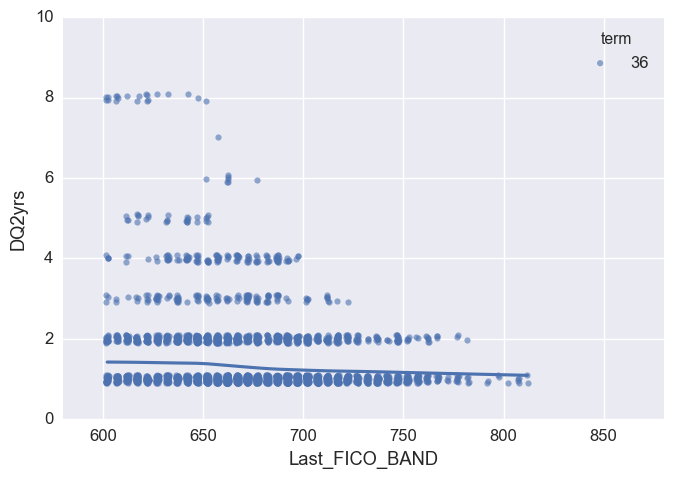

In [46]:
## Plot to examine the relationship between DQ2yrs and FICO score

plot_df = df.query('DQ2yrs > 0 & Last_FICO_BAND > 600')[:3000]

sns.set(font_scale=1.2, rc={"lines.linewidth": 1.5}) 

g = sns.lmplot("Last_FICO_BAND", "DQ2yrs", x_jitter= .7,  y_jitter= .1,
           data=plot_df, hue='term',lowess=True, size=5,aspect=1.4, legend_out=False,
           scatter_kws={ 's':20, 'alpha':.6})

g.set(xlim=(580, 880),ylim=(0, 10),alpha = .5)

g.savefig('LC_Subset_DQ2y_FICO.png',transparent=True)
sns.plt.show()

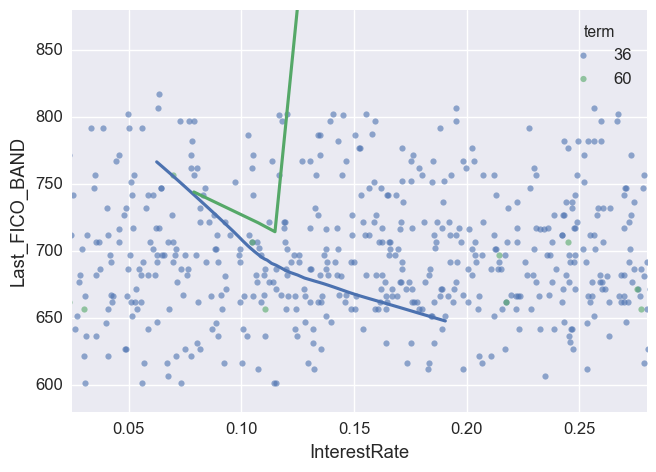

In [27]:
## Plot to examine the relationship between interest rate and FICO score
plot_df = df.query('Last_FICO_BAND > 600 & InterestRate < .28')[:3000]

sns.set(font_scale=1.2, rc={"lines.linewidth": 1.5}) 

g = sns.lmplot("InterestRate", "Last_FICO_BAND", x_jitter= .7,  y_jitter= .1,
           data=plot_df, hue='term',lowess=True, size=5,aspect=1.4, legend_out=False,
           scatter_kws={ 's':20, 'alpha':.6})

g.set(xlim=(.025, .28),ylim=(580, 880),alpha = .5)

g.savefig('LC_Subset_iFICO.png',transparent=True)
sns.plt.show()

In [6]:
df.shape
# list(df)

(374225, 19)

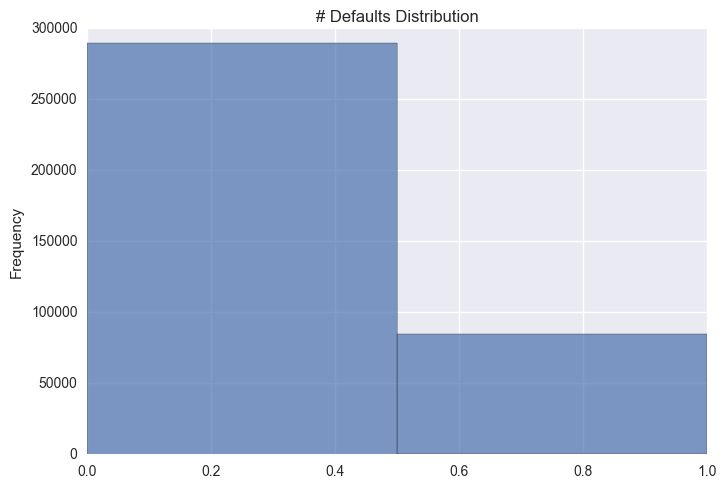

In [63]:
###### DISTRIBUTION OF DEPENDENT VARIABLE: Default (categorical) ######
import matplotlib.pyplot as plt

y = df.Default.values
np.unique(y), pd.Series(y).plot(kind='hist',alpha=.7, bins=2, title='# Defaults Distribution')
plt.show()

In [7]:
feats = df.columns.values
feats

array(['InterestRate', 'MONTHLYCONTRACTAMT', 'dti', 'MonthlyIncome',
       'OpenCREDITLines', 'TotalCREDITLines', 'RevolvingCREDITBalance',
       'RevolvingLineUtilization', 'Inquiries6M', 'DQ2yrs', 'PublicRec',
       'EmploymentLength', 'term', 'APPL_FICO_BAND', 'LOAN_AMT', 'Default',
       'StateCat', 'HomeOwnCat', 'EarliestCreditMonths'], dtype=object)

# Random Forest Classification

In [24]:
###### RANDOM FOREST - Categorical DV ######

## GridSearch first for best parameters of RFC
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier  # takes in categorical DV
from sklearn.ensemble import RandomForestRegressor   # continuous DV

# X = Explanatory
X = df[['LOAN_AMT', 'InterestRate', 'MONTHLYCONTRACTAMT', 'dti',
       'MonthlyIncome', 'OpenCREDITLines', 'TotalCREDITLines',
       'RevolvingCREDITBalance', 'RevolvingLineUtilization', 'Inquiries6M',
       'DQ2yrs', 'PublicRec', 'EmploymentLength', 'term', 'APPL_FICO_BAND',
       'StateCat', 'HomeOwnCat', 'EarliestCreditMonths']]
# X = df[feats]
# y = Target
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The classes are either '1' or '0' where the ratio of class '0':'1' is 7.72:1
weight0 = 1
weight1 = 3.4
#cl_weight = {0:weight0, 1:weight1}
# Sample weights you want the model to train on: default is 1, equal weights

# Build a classification task using 10 informative features
X, y = make_classification(n_samples=5000,
                           n_features=18,
                           n_informative=18,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

####
# cl_weight = {0:weight1, 1:weight2}
# clf = RandomForestClassifier(n_estimators=400, max_depth=None, min_samples_split=2, random_state=0, oob_score=True, class_weight = cl_weight, criterion=âgini")
# sample_weight = np.array([weight if m == 1 else 1 for m in df_tr[label_column]])
# y_pred = clf.fit(X_tr, y_tr,sample_weight= sample_weight).predict(X_te)
####
                             
# rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=20, oob_score = True, class_weight = cl_weight) 
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=100, class_weight="balanced") 

rfc.fit(X_train, y_train)
results_train = rfc.predict(X_train)
results = rfc.predict(X_test)
prob = rfc.predict_proba(X_test)

In [25]:
###### Quick check of results
results[0:20]
prob[0:20]
# Note: for prob, the second column is for default

array([[ 0.65,  0.35],
       [ 0.84,  0.16],
       [ 0.83,  0.17],
       [ 0.92,  0.08],
       [ 0.66,  0.34],
       [ 0.93,  0.07],
       [ 0.65,  0.35],
       [ 0.96,  0.04],
       [ 0.56,  0.44],
       [ 0.9 ,  0.1 ],
       [ 0.41,  0.59],
       [ 0.72,  0.28],
       [ 0.83,  0.17],
       [ 0.63,  0.37],
       [ 0.85,  0.15],
       [ 0.59,  0.41],
       [ 0.92,  0.08],
       [ 0.93,  0.07],
       [ 0.88,  0.12],
       [ 0.88,  0.12]])

In [19]:
######### Pickle the RF output results and predictions #########
import pickle

with open('RandomForest3.cpickle', 'wb') as f:
    pickle.dump(rfc, f)

In [ ]:
######### OPEN SAVED RF MODEL WITH PICKLE (Only needed if kernel died) #########
with open('RandomForest3.cpickle', 'rb') as f:
    rf = cPickle.load(f)

# preds = rfc.predict(X_test)

In [26]:
### Recall, precision --> F1 Score
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, results)
precision

array([ 0.22434364,  0.53637596,  1.        ])

In [28]:
from sklearn import metrics

# testing score
score = metrics.f1_score(y_test, results)
#score = metrics.f1_score(y_test, results, pos_label=list(set(y_test)))

# training score
score_train = metrics.f1_score(y_train, results_train)
score_train

0.99997058347673895

In [29]:
### Accuracy Score
pscore = metrics.accuracy_score(y_test, results)
pscore_train = metrics.accuracy_score(y_train, results_train)
pscore

0.77780746876878881

## Plot the ROC curve

In [88]:
### Obtain ROC and AUC scores
roc = metrics.roc_curve(y_test, results, pos_label=None, sample_weight=None, drop_intermediate=True)
auc = metrics.roc_auc_score(y_test, results, average='macro', sample_weight=None)
auc

0.56230726214804827

ROC AUC: 0.70


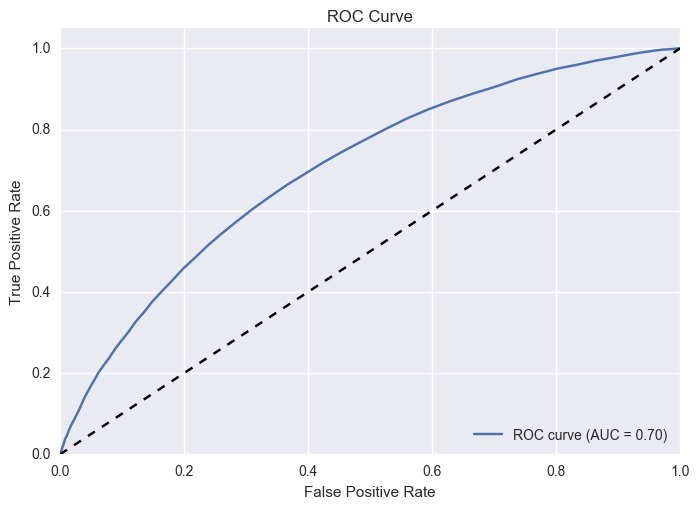

In [30]:
##### Plot the ROC and show AUC #####
# Calculate the AUC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

roc_auc = metrics.auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
##### Mean Squared Error of Training
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, results_train)
print("MSE: %.4f" % mse)

MSE: 0.0000


In [32]:
##### Mean Squared Error of Test
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, results)
print("MSE: %.4f" % mse)

MSE: 0.2222


## Feature Analysis

In [77]:
print(rfc.feature_importances_)

[ 0.05453261  0.15439362  0.10579482  0.06737394  0.07640298  0.06284842
  0.04108487  0.05069313  0.06441738  0.06475677  0.02055524  0.01101651
  0.00797813  0.02906422  0.02292337  0.04618933  0.04625503  0.01141737
  0.06230226]


In [33]:
###### Important Features Ranking ######

# X_titles = ['LOAN_AMT', 'InterestRate', 'MONTHLYCONTRACTAMT', 'dti',
#        'MonthlyIncome', 'OpenCREDITLines', 'TotalCREDITLines',
#        'RevolvingCREDITBalance', 'RevolvingLineUtilization', 'Inquiries6M',
#        'DQ2yrs', 'PublicRec', 'EmploymentLength', 'term', 'APPL_FICO_BAND',
#        'StateCat', 'HomeOwnCat', 'EarliestCreditMonths']

# Prettier translated variable titles
X_titles = ['Loan Amount', 'Interest Rate', 'Monthly Payment', 'Debt-to-Income',
       'Monthly Income', 'Open Credit Lines', 'Total Credit Lines',
       'Revolving Credit Balance', 'Revolving Line Utilization', 'Inquiries - past 6M',
       'Delinquencies - past 2Y', 'Public Records', 'Employment Length', 'Term', 'Average Fico Score',
       'State', 'Home Ownership', 'Months Since Earliest Credit']

### Variables seen by investor: map to my vars ###
#  'DUE_AMT' = 'AMT'???
#  'MOB' = 'SUBMIT_DATE'??
#  'InterestRate' = 'INTERESTRATE'
#  'MONTHLYCONTRACTAMT' = 'MON_PMT'
#  'dti'='DTI'
#  'MonthlyIncome' = 'MON_INCOME'
#  'OpenCREDITLines' = 'OPENCRLINES'
#  'TotalCREDITLines' = 'TOTCRLINES'
#  'RevolvingCREDITBalance' = 'RevolvingCREDITBalance'
#  'RevolvingLineUtilization' = 'RevolvingLineUtilization'
#  'Inquiries6M' = 'Inquiries6M'
#  'DQ2yrs' = 'DQ2yrs'
#  'PublicRec' = 'PublicRec'
#  'EmploymentLength' = 'EMP_LENGTH'
#  'APPL_FICO_BAND' = 'APPL_FICO_BAND'
#  'StateCat' = 'STATE'
#  'HomeOwnCat' = 'HOMEOWNERSHIP'
#  'GradeCat' = 'GRADE'
#  'EarliestCreditMonths' = 'EARLIESTCREDIT'
#  'term' = 'LOANLENGTH'

feature_names = np.array(X_titles)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_
                            for tree in rfc.estimators_], axis=0)
indices = np.argsort(X_titles)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. Total Credit Lines (0.061019)
2. Term (0.022693)
3. State (0.055134)
4. Revolving Line Utilization (0.078083)
5. Revolving Credit Balance (0.078070)
6. Public Records (0.008870)
7. Open Credit Lines (0.049556)
8. Months Since Earliest Credit (0.076141)
9. Monthly Payment (0.081449)
10. Monthly Income (0.074070)
11. Loan Amount (0.066843)
12. Interest Rate (0.116654)
13. Inquiries - past 6M (0.023864)
14. Home Ownership (0.012776)
15. Employment Length (0.035144)
16. Delinquencies - past 2Y (0.012434)
17. Debt-to-Income (0.091768)
18. Average Fico Score (0.055430)


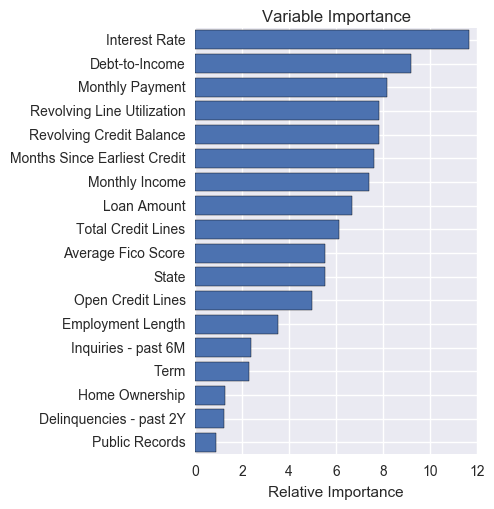

In [34]:
###### Plot the feature importances of the forest ######
from matplotlib import pyplot as plt

feature_importance = rfc.feature_importances_
# make importances relative to max importance
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance = 100.0 * feature_importance

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## EXTRA STUFF, NOT YET HAD TIME FOR

In [27]:
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        results[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], results[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    results.ravel())
average_precision["micro"] = average_precision_score(y_test, results,
                                                     average="micro")


# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

ValueError: Can only tuple-index with a MultiIndex

In [37]:
# savetxt('RF_fit.csv', rfc.predict(X_test), delimiter=',', fmt='%f')
    
# param_grid = { 
#     'n_estimators': [200, 700],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# y_pred = CV_rfc.fit(X, y).predict(X_test)
# print(CV_rfc.best_params_)
# print(y_pred)

In [ ]:
##### Gradient Boosted Regression Trees
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

X, y = shuffle(df.values, y, random_state=30)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.75)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

##### Estimate Best Parameters
from sklearn.grid_search import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              'max_features': [1.0, 0.3, 0.1]
              }
# param_grid = {'learning_rate': [0.1],
#               'max_depth': [4],
#               'min_samples_leaf': [3],
#               'max_features': [1.0],
#               }

est = GridSearchCV(ensemble.GradientBoostingRegressor(n_estimators=100),
                   param_grid, n_jobs=4, refit=True)

est.fit(X_train, y_train)

best_params = est.best_params_

##### Run the Gradient Boosting 
est = ensemble.GradientBoostingRegressor(n_estimators=2000).fit(X_train, y_train)

##### Get 
est.score(X_test,y_test)

In [ ]:
##### Look at Partial Dependence Plots to understand the functional relations between predictors and an outcome
## capture marginal effect of a given variable or variables on the target function, in this case defaults

from sklearn.ensemble.partial_dependence import plot_partial_dependence

comp_features = [('annual_inc','dti'),'loan_amnt','Last_FICO_BAND','annual_inc', 'inq_last_6mths', 'revol_util', 'dti']

fig, axs = plot_partial_dependence(est, X_train, comp_features,
                                   feature_names=list(df.columns),
                                   figsize=(14, 14), n_jobs=4)

In [39]:
##### Additional plots to look at relationships

## TAKES A REAAAALLLLY LONG TIME, BUT LOOKS COOL.. HEAT MAP TYPE PLOT

# sns.jointplot(y,df.Last_FICO_BAND.values,annot_kws=dict(stat="r"),
#               kind="kde", color="#4CB391").set_axis_labels("DQ2yrs", "Last_FICO_BAND")
# sns.plt.show()

KeyboardInterrupt: 